In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins


cities = pd.read_csv("../data/cities.csv")
cities.rename(columns = {'id': "city_id"}, inplace=True)
cities.sample(10)

,city_id,name,coords,start_year,url_name,country,country_state
75,53,Havana,POINT(-82.38333333 23.13333333),2017.0,havana,Cuba,NaN
19,276,Biarritz,POINT(-1.561594891 43.47327537),2018.0,biarritz,France,NaN
196,130,Anchorage,POINT(-149.9 61.21666667),2017.0,anchorage,United States,Alaska
125,91,Osaka,POINT(135.5 34.53333333),1874.0,osaka,Japan,NaN
11,18,Belgrade,POINT(20.53333333 44.86666667),2017.0,belgrade,Serbia,NaN
319,107,Shanghai,POINT(121.4666667 31.16666667),1990.0,shanghai,China,NaN
6,11,Athens,POINT(23.71666667 37.96666667),2017.0,athens,Greece,NaN
225,169,Havre,POINT(-109.7166667 48.55),2017.0,havre,United States,Mont.
55,40,Dakar,POINT(-17.46666667 14.66666667),2017.0,dakar,Senegal,NaN
21,278,Perpignan,POINT(2.899967406 42.69998924),2018.0,perpignan,France,NaN


In [3]:
lines = pd.read_csv("../data/lines.csv")
lines.sample(16)

,id,city_id,name,url_name,color,system_id,transport_mode_id
1060,1111,1,La Matanza,1111-la-matanza,#f3d379,416,6.0
330,612,23,A,612-a,#6f2895,16,NaN
525,644,1,San Martín,644-san-martin,#4a4a4a,338,3.0
945,1033,114,Chuo-Ichiba Line,1033-chuo-ichiba-line,#5f0101,410,5.0
1251,1347,124,El Peral,1347-el-peral,#4a90e2,493,7.0
1019,389,95,T 9,389-t-9,#009cb4,296,5.0
229,388,95,U,388-u,#d60058,298,2.0
952,1047,114,Hodogaya Line,1047-hodogayabashi-line,#5f0101,410,5.0
611,717,77,64,717-64,#000,354,5.0
862,982,14,T4,982-t4,#159585,392,NaN


In [4]:
station_lines = pd.read_csv('../data/station_lines.csv')
station_lines.sample(16)

,id,station_id,line_id,city_id,created_at,updated_at
5917,6066,4686,364,95,2017-11-21 00:00:00,2017-11-21 00:00:00
13116,14020,13757,1280,4,2018-09-28 18:45:40.066241,2018-09-28 18:45:40.066241
5132,5249,2302,159,69,2017-11-21 00:00:00,2017-11-21 00:00:00
10346,12326,12344,1190,317,2018-07-23 20:37:42.885839,2018-07-23 20:37:42.885839
4576,4687,1368,78,78,2017-11-21 00:00:00,2017-11-21 00:00:00
11427,15002,14697,1359,261,2018-10-17 16:04:33.696709,2018-10-17 16:04:33.696709
11819,15176,14859,1128,139,2018-10-18 21:24:48.830349,2018-10-18 21:24:48.830349
6090,8598,8947,793,48,2017-11-21 18:46:22.673028,2017-11-21 18:46:22.673028
2571,2673,8202,661,114,2017-11-21 00:00:00,2017-11-21 00:00:00
14211,7070,5738,367,95,2017-11-21 00:00:00,2017-11-21 00:00:00


In [5]:
stations = pd.read_csv('../data/stations.csv')
stations[stations['name'] == "Pico"]

,id,name,geometry,buildstart,opening,closure,city_id
476,8567,Pico,POINT(-118.2662644 34.0406307),0.0,0.0,999999.0,189
870,8568,Pico,POINT(-118.2660609 34.0407563),0.0,0.0,999999.0,189
12246,12132,Pico,POINT(-58.4741980951992 -34.5410318797355),2014.0,2015.0,999999.0,1


In [6]:
systems = pd.read_csv('../data/stations.csv')
systems

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91


In [7]:
track_lines = pd.read_csv('../data/track_lines.csv')
track_lines

,id,section_id,line_id,created_at,updated_at,city_id
0,2494,1278,343,2017-11-21 00:00:00,2017-11-21 00:00:00,252
1,4124,4477,779,2017-11-21 00:09:55.135507,2017-11-21 00:09:55.135507,63
2,2495,21,9,2017-11-21 00:00:00,2017-11-21 00:00:00,1
3,2496,940,228,2017-11-21 00:00:00,2017-11-21 00:00:00,79
4,4129,4478,793,2017-11-21 17:44:39.765832,2017-11-21 17:44:39.765832,48
...,...,...,...,...,...,...
9752,10699,10530,1611,2019-03-06 22:23:46.008756,2019-03-06 22:23:46.008756,91
9753,10700,10531,1611,2019-03-06 22:27:46.532431,2019-03-06 22:27:46.532431,91
9754,10701,10532,1611,2019-03-06 22:30:58.779519,2019-03-06 22:30:58.779519,91
9755,10702,10533,1610,2019-03-08 21:57:21.68915,2019-03-08 21:57:21.68915,91


In [8]:
tracks = pd.read_csv('../data/tracks.csv')
tracks

,id,geometry,buildstart,opening,closure,length,city_id
0,1911,"LINESTRING(19.0817752 47.5005079,19.0817355 47...",0.0,0.0,999999.0,6719,29
1,2563,"LINESTRING(16.4151057 48.1907238,16.4156455 48...",0.0,0.0,999999.0,199,118
2,2557,"LINESTRING(16.4164437 48.1839655,16.4161534 48...",0.0,0.0,999999.0,925,118
3,2558,"LINESTRING(16.4164901 48.1839473,16.416198 48....",0.0,0.0,999999.0,881,118
4,2564,"LINESTRING(16.415259 48.1908074,16.4153634 48....",0.0,0.0,999999.0,213,118
...,...,...,...,...,...,...,...
9266,9732,"LINESTRING(-3.838067 56.0044551,-3.8385588 56....",0.0,0.0,999999.0,383,48
9267,9734,"LINESTRING(-3.8549229 55.9960854,-3.8544735 55...",0.0,0.0,999999.0,28,48
9268,9735,"LINESTRING(-3.8597111 55.9955538,-3.8572319 55...",0.0,0.0,999999.0,305,48
9269,9736,"LINESTRING(-3.8544735 55.9961285,-3.8529015 55...",0.0,0.0,999999.0,828,48


In [19]:
ranked_countries = cities["country"].value_counts().sort_values(ascending=False)

top_five_countries = ranked_countries[0:5]

fig, ax = plt.subplots()

ax.bar(top_five_countries.index, top_five_countries.values)



United States    115
France            71
Canada            14
Spain              8
England            8
Name: country, dtype: int64

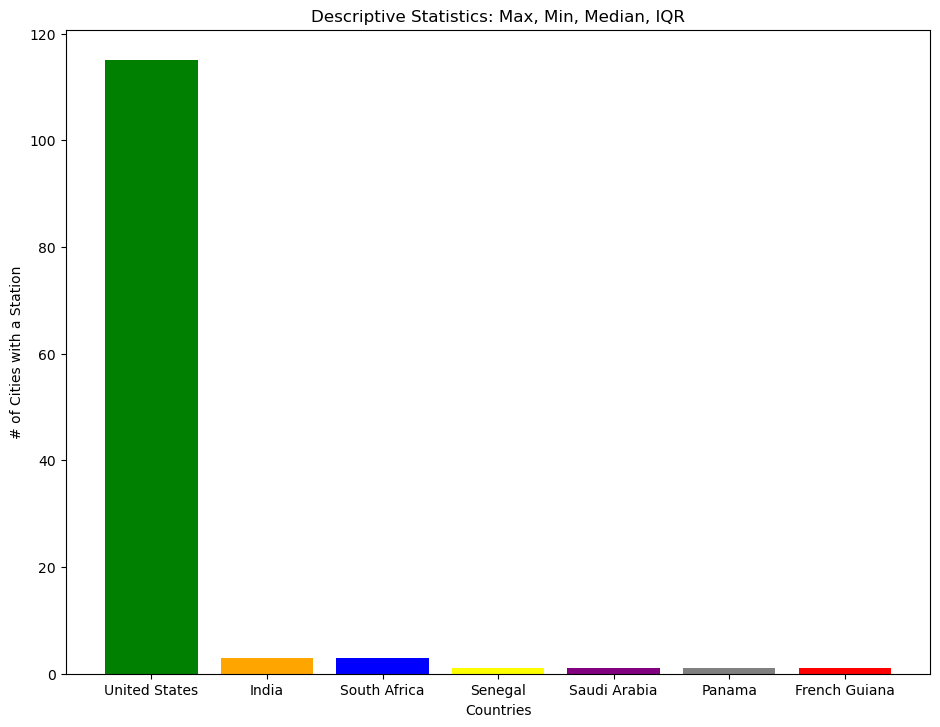

In [33]:


top_country = ranked_countries.max()
top_country_name = ranked_countries.idxmax()

bottom_country = ranked_countries.min()
bottom_country_name = ranked_countries.idxmin()

median_country = ranked_countries.median()
median_country_name = ranked_countries.index[int((len(ranked_countries) -1 ) / 2)]

q3a_country = ranked_countries.iloc[17]
q3a_country_name = ranked_countries.index[17]

q3b_country = ranked_countries.iloc[18]
q3b_country_name = ranked_countries.index[18]


q1a_country = ranked_countries.iloc[-18]
q1a_country_name = ranked_countries.index[-18]

q1b_country = ranked_countries.iloc[-19]
q1b_country_name = ranked_countries.index[-19]

countries = [
    top_country_name, q3a_country_name, 
    q3b_country_name, median_country_name, 
    q1a_country_name, q1b_country_name,
    bottom_country_name]

values = [
    top_country, q3a_country,
    q3b_country, median_country,
    q1a_country, q1b_country,
    bottom_country
]

fig, ax = plt.subplots()
c = ['green', 'orange', 'blue', 'yellow', 'purple', 'grey', 'red']
ax.bar(countries, values, color = c)
ax.set_title("Descriptive Statistics: Max, Min, Median, IQR")
ax.set_ylabel("# of Cities with a Station")
ax.set_xlabel("Countries")
fig.tight_layout()
fig.set_size_inches(10,8)




In [11]:
united_states = cities[cities["country"] == "United States"]

united_states

,city_id,name,coords,start_year,url_name,country,country_state
14,147,Chicago,POINT(-87.61666667 41.83333333),1892.0,chicago,United States,Ill.
163,155,Detroit,POINT(-83.05 42.33333333),2017.0,detroit,United States,Mich.
164,170,Helena,POINT(-112.0333333 46.58333333),2017.0,helena,United States,Mont.
165,214,Pierre,POINT(-100.35 44.36666667),2017.0,pierre,United States,S.D.
180,138,Boise,POINT(-116.2166667 43.6),2017.0,boise,United States,Idaho
...,...,...,...,...,...,...,...
300,248,Tulsa,POINT(-95.98333333 36.15),2017.0,tulsa,United States,Okla.
303,251,Virginia Beach,POINT(-75.96666667 36.85),2017.0,virginia-beach,United States,Va.
305,253,Wichita,POINT(-97.28333333 37.71666667),2017.0,wichita,United States,Kan.
306,254,Wilmington,POINT(-77.95 34.23333333),2017.0,wilmington,United States,N.C.


In [12]:
merged_cities_stations = pd.merge(stations, cities, on='city_id', how='left')
merged_cities_stations_us = merged_cities_stations[merged_cities_stations['country'] == 'United States']
merged_cities_stations_us.sample(10)

,id,name_x,geometry,buildstart,opening,closure,city_id,name_y,coords,start_year,url_name,country,country_state
14207,14732,Fenway,POINT(-71.1041830685 42.3452668824608),1959.0,1959.0,999999.0,139,Boston,POINT(-71.08333333 42.35),1806.0,boston,United States,Mass.
14389,14985,Natick,POINT(-71.3469167229423 42.2858056656891),1834.0,1834.0,1973.0,139,Boston,POINT(-71.08333333 42.35),1806.0,boston,United States,Mass.
13902,14358,Roslyn,POINT(-73.6432015528347 40.7903338897884),1865.0,1865.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
14138,14655,Manitou,POINT(-73.9702718930043 41.3327256115959),1983.0,1983.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
13834,14283,Queens Village,POINT(-73.735875834006 40.7176377072473),1881.0,1881.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
11441,13107,Appalachian Trail,POINT(-73.5880418994499 41.592894818052),1991.0,1991.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
13656,14092,Avenue M,POINT(-73.9595550622005 40.6180491956873),1878.0,1878.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
8984,14344,Corona,POINT(-73.8641013434436 40.7459458149641),1853.0,1853.0,1964.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
2803,8667,Theater District,POINT(-122.440014 47.2562005),2001.0,2003.0,999999.0,236,Seattle,POINT(-122.3333333 47.61666667),1961.0,seattle,United States,Wash.
14328,14920,Ball Square,POINT(-71.11076831653 42.3995551282052),2021.0,2021.0,999999.0,139,Boston,POINT(-71.08333333 42.35),1806.0,boston,United States,Mass.


<BarContainer object of 7 artists>

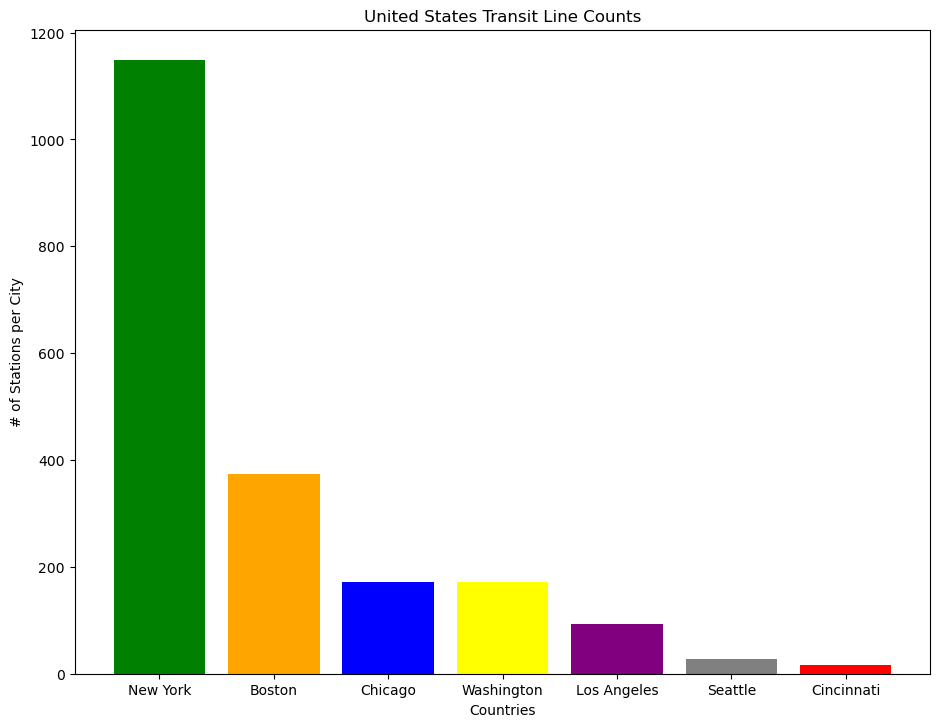

In [29]:
merged_stations_us_by_state = merged_cities_stations_us.value_counts('name_y')
merged_stations_us_by_state

fig, ax = plt.subplots()
ax.set_title("United States Transit Line Counts")
ax.set_ylabel("# of Stations per City")
ax.set_xlabel("Countries")
fig.tight_layout()
fig.set_size_inches(10,8)
c = ['green', 'orange', 'blue', 'yellow', 'purple', 'grey', 'red']
ax.bar(merged_stations_us_by_state.index, merged_stations_us_by_state.values, color = c)

In [14]:
stations

,id,name,geometry,buildstart,opening,closure,city_id
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114
1,6003,Kossuth Lajos tér,POINT(19.0462376564033 47.5054880717671),0.0,0.0,999999.0,29
2,7732,Saint-Charles,POINT(5.3801556 43.3024646),1973.0,1977.0,999999.0,74
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114
4,7726,Chartreux,POINT(5.4014815 43.309129),1973.0,1977.0,999999.0,74
...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91


In [32]:
merged_cities_stations.sample(10)

# def openings_years_per_country(df, country1, country2, country3, country4, country5):
#     openings_per_country_df = pd.DataFrame()
#     openings_per_country_df[country1] = df[(df['country'] == country1) & (df['opening'] > 0)].value_counts('opening')
#     openings_per_country_df[country2] = df[(df['country'] == country2) & (df['opening'] > 0)].value_counts('opening')
#     openings_per_country_df[country3] = df[(df['country'] == country3) & (df['opening'] > 0)].value_counts('opening')
#     openings_per_country_df[country4] = df[(df['country'] == country4) & (df['opening'] > 0)].value_counts('opening')
#     openings_per_country_df[country5] = df[(df['country'] == country5) & (df['opening'] > 0)].value_counts('opening')

#     openings_per_country_df[[country1, country2, country3, country4, country5]] = \
#         openings_per_country_df[[country1, country2, country3, country4, country5]].fillna(0)

#     return openings_per_country_df.sort_index()


# openings_per_country_df = openings_years_per_country(merged_cities_stations, 'United States', "France", 'Canada', 'Spain', 'England')

# fig, axs = plt.subplots(2,1)

# axs[1].plot(openings_per_country_df)
# axs[1].set_xlim(1833, 2023)
# # axs[1].legend()
# axs[0].bar(top_five_countries.index, top_five_countries.values)
# fig.set_size_inches(16, 10)
# fig.tight_layout()



,id,name_x,geometry,buildstart,opening,closure,city_id,name_y,coords,start_year,url_name,country,country_state
13390,13812,Paradero 48 Santa Rosa,POINT(-70.6265598862663 -33.6185870611372),2009.0,2009.0,999999.0,4,Santiago,POINT(-70.6544495 -33.453214),1850.0,santiago-de-chile,Chile,NaN
14224,14758,Sakai,POINT(135.468783252201 34.5819599151621),1888.0,1888.0,999999.0,91,Osaka,POINT(135.5 34.53333333),1874.0,osaka,Japan,NaN
1665,7145,Carriet,POINT(-0.523887 44.8822095),NaN,2008.0,999999.0,23,Bordeaux,POINT(-0.5166666667 44.83333333),1998.0,bordeaux,France,NaN
6076,5883,Shibuya,POINT(139.701143491339 35.6594286931147),1977.0,1977.0,2000.0,114,Tokyo,POINT(139.75 35.66666667),1872.0,tokyo,Japan,NaN
4618,2144,NaN,POINT(-0.200862350012301 51.6563136967482),1940.0,1940.0,999999.0,69,London,POINT(-0.08333333333 51.53333333),1833.0,london,England,NaN
11586,11487,Chivilcoy,POINT(-58.4859433427867 -34.6251362871732),2010.0,2011.0,999999.0,1,Buenos Aires,POINT(-58.4122003 -34.6050499),1854.0,buenos-aires,Argentina,NaN
6588,3075,Saxa Rubra,POINT(12.4937983460126 41.9775095957112),1932.0,1932.0,1990.0,103,Rome,POINT(12.45 41.9),1924.0,rome,Italy,NaN
74,6017,Togoshi-koen,POINT(139.718319462119 35.6089520074692),1927.0,1927.0,1963.0,114,Tokyo,POINT(139.75 35.66666667),1872.0,tokyo,Japan,NaN
8549,14079,Beach 36th Street,POINT(-73.7685123932745 40.5952023669192),1956.0,1956.0,999999.0,206,New York,POINT(-73.96666667 40.78333333),1832.0,new-york,United States,N.Y.
11107,11650,Tobu Izumi,POINT(139.455196494923 36.3153999785078),1935.0,1935.0,999999.0,114,Tokyo,POINT(139.75 35.66666667),1872.0,tokyo,Japan,NaN


In [16]:
us_station_map = merged_cities_stations_us[['name_x', 'geometry', 'name_y']]
us_station_map.rename(columns={'name_x':'station', 'name_y':'city'}, inplace=True)
us_station_map['lat'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[1].split(")")[0])
us_station_map['long'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[0])
us_station_map



C:\Users\muscl\AppData\Local\Temp\ipykernel_7576\33158620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_station_map.rename(columns={'name_x':'station', 'name_y':'city'}, inplace=True)
C:\Users\muscl\AppData\Local\Temp\ipykernel_7576\33158620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_station_map['lat'] = us_station_map['geometry'].apply(lambda x: x.split("POINT(")[1].split(" ")[1].split(")")[0])
C:\Users\muscl\AppData\Local\Temp\ipykernel_7576\33158620.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

,station,geometry,city,lat,long
351,Sands Street,POINT(-73.9900595885681 40.6999957881726),New York,40.6999957881726,-73.9900595885681
460,Sands Street,POINT(-73.9909195185139 40.7000028855033),New York,40.7000028855033,-73.9909195185139
461,7th Street/Metro Center,POINT(-118.2586637 34.0486686),Los Angeles,34.0486686,-118.2586637
476,Pico,POINT(-118.2662644 34.0406307),Los Angeles,34.0406307,-118.2662644
524,Franklin Avenue,POINT(-73.9558290151206 40.6809373893361),New York,40.6809373893361,-73.9558290151206
...,...,...,...,...,...
15448,West Edge,POINT(-122.336763227539 47.6058839076996),Seattle,47.6058839076996,-122.336763227539
15449,South Lake Union-Seattle Center,POINT(-122.343234884068 47.6203175414603),Seattle,47.6203175414603,-122.343234884068
15503,Friendship Heights,POINT(-77.0854410365934 38.9615399698817),Washington,38.9615399698817,-77.0854410365934
15504,Wisconsin Ave @ Jenifer,POINT(-77.0848162794167 38.9591131645103),Washington,38.9591131645103,-77.0848162794167


In [17]:


map_us=folium.Map()

us_stations=pd.DataFrame({"lat":us_station_map['lat'],"long":us_station_map['long']})

map_us.add_child(plugins.HeatMap(data=us_stations))

map_us